In [1]:
#Importação das bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geojson

In [2]:
#Leitura dos dados provindos de planilhas fornecidas pela ANS(Agência Nacional
#de Saúde Suplementar) e pelo IBGE
planos_si=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 5',index_col=0))
planos_est=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 4',index_col=0))
planos=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 1',index_col=0))
pop=np.matrix(pd.read_excel("populacao (1).xlsx",index_col=0))
des=np.matrix(pd.read_excel("desemprego.xlsx",index_col=0))[2]
pib=np.matrix(pd.read_excel("pib-brasil.xls",sheet_name="Planilha1",index_col=0))
sex_idade=np.matrix(pd.read_excel("sexo_idade.xlsx",sheet_name="Planilha1"))

In [3]:
#Criação de listas com os dados de população, planos de saúde e anos.
des=des[0,11::12]
dimdes=des.shape
npop=[]
for i in range(dimdes[1]):
    npop+=[pop[3,i]]
ndes=[]
for i in range(dimdes[1]-1):
    ndes+=[((float(des[0,i+1])*npop[i]/float(des[0,i])/npop[i+1])-1)/10]

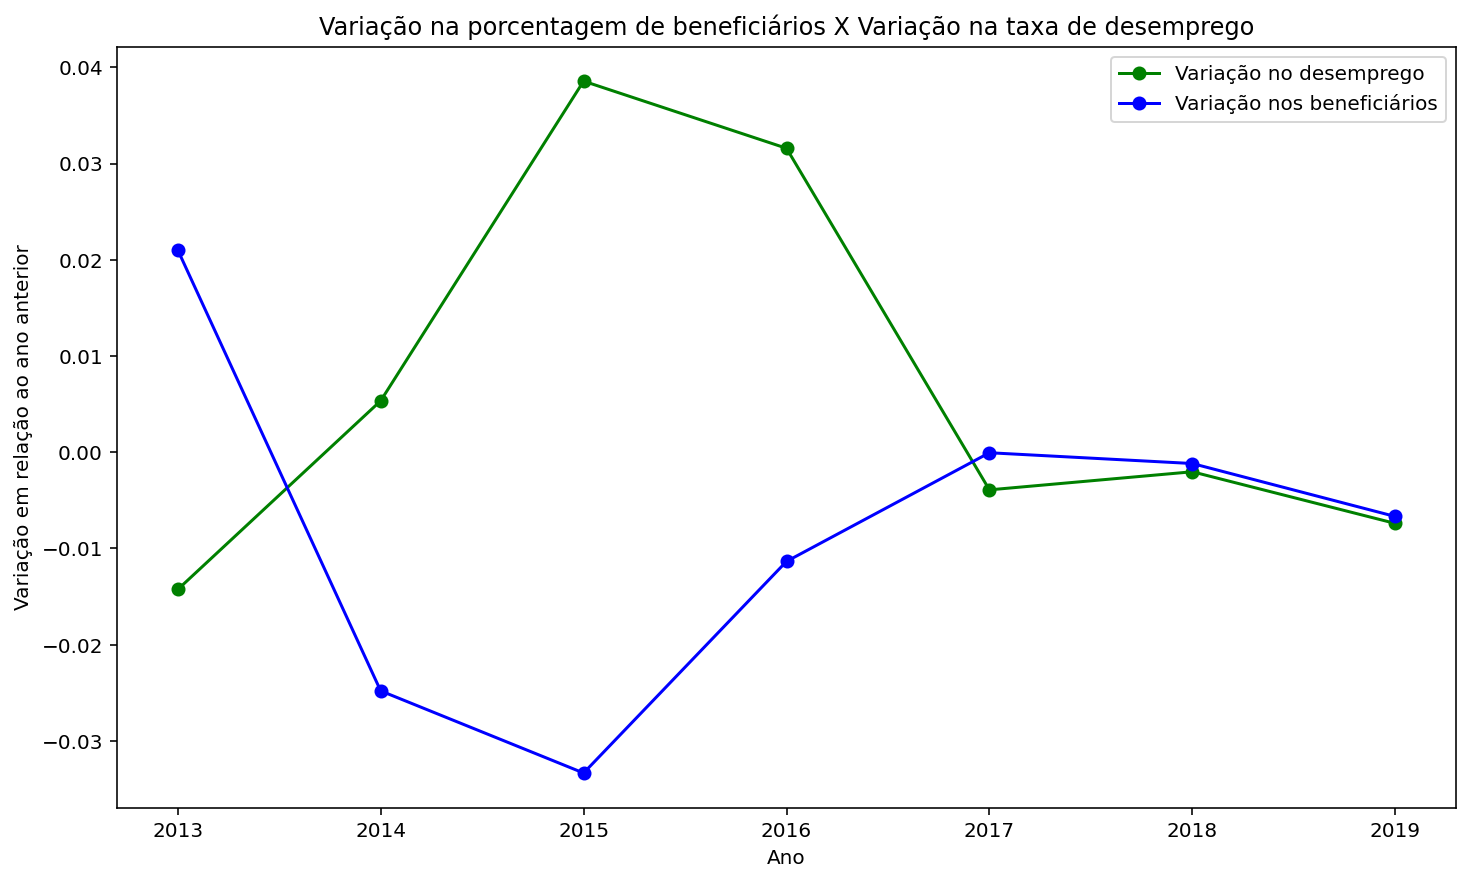

In [4]:
#Criação de lista com os dados de desemprego e de gráfico comparando a variação
#do desemprego com a da porcentagem da população beneficiária de planos.
nplanos=[]
for i in range(26-len(ndes),26):
    nplanos+=[(planos[i+1,0]/planos[i,0])-1]
anos=[]
for i in range(len(ndes)):
    anos+=[str(2013+i)]
plt.plot(anos,ndes, color='green', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na porcentagem de beneficiários X Variação na taxa de desemprego')
plt.legend(('Variação no desemprego','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

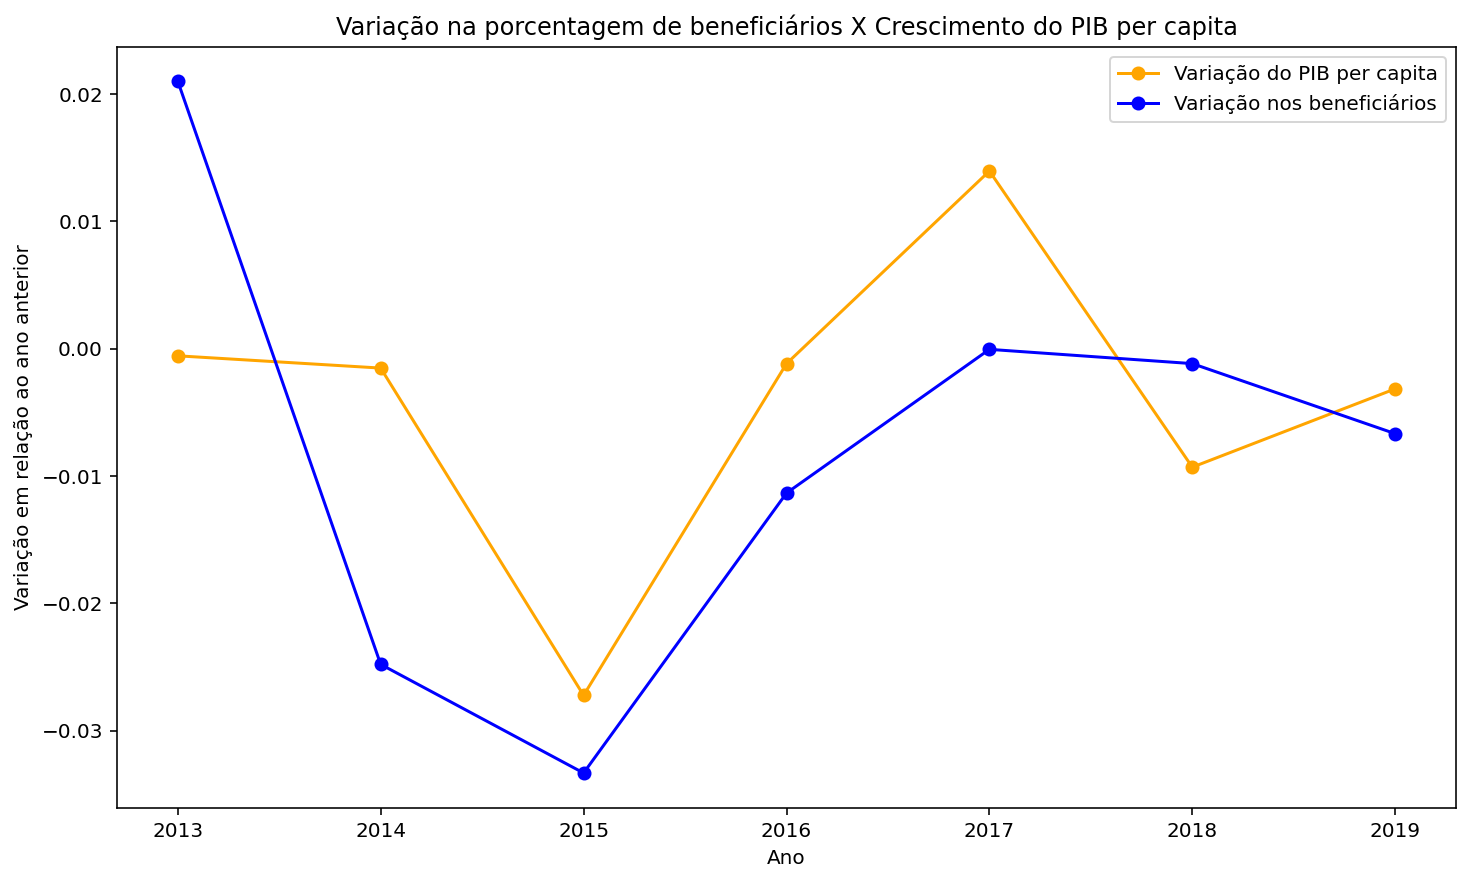

In [5]:
#Criação de lista com os dados de PIB per capita e de gráfico comparando a
#variação nesse PIB com a da porcentagem da população beneficiária de planos.
pib=pib[0,55:63]
npib=[]
for i in range(7):
    npib+=[((pib[0,i+1]/pib[0,i])-1)/10]
plt.plot(anos,npib, color='orange', marker='o')
plt.plot(anos, nplanos, color='blue', marker='o')
plt.title('Variação na porcentagem de beneficiários X Crescimento do PIB per capita')
plt.legend(('Variação do PIB per capita','Variação nos beneficiários'))
plt.xlabel("Ano")
plt.ylabel('Variação em relação ao ano anterior')
plt.show()

In [6]:
#Criação de listas com os dados da aderência de homens e mulheres de diferentes
#faixas etárias a planos de saúde
M_planos=[]
F_planos=[]
M_col=[]
F_col=[]
M_ind=[]
F_ind=[]
idades=[]
for i in range(9):
    M_planos+=[planos_si[7+i,2]/sex_idade[i,1]]
    F_planos+=[planos_si[7+i,1]/sex_idade[i,2]]
    M_col+=[planos_si[18+i,2]/sex_idade[i,1]]
    F_col+=[planos_si[18+i,1]/sex_idade[i,2]]
    M_ind+=[planos_si[29+i,2]/sex_idade[i,1]]
    F_ind+=[planos_si[29+i,1]/sex_idade[i,2]]
    if i<8:
        idades+=[str(10*i)+"a"+str(10*i+9)]
    else:
        idades+=["80 ou mais"]

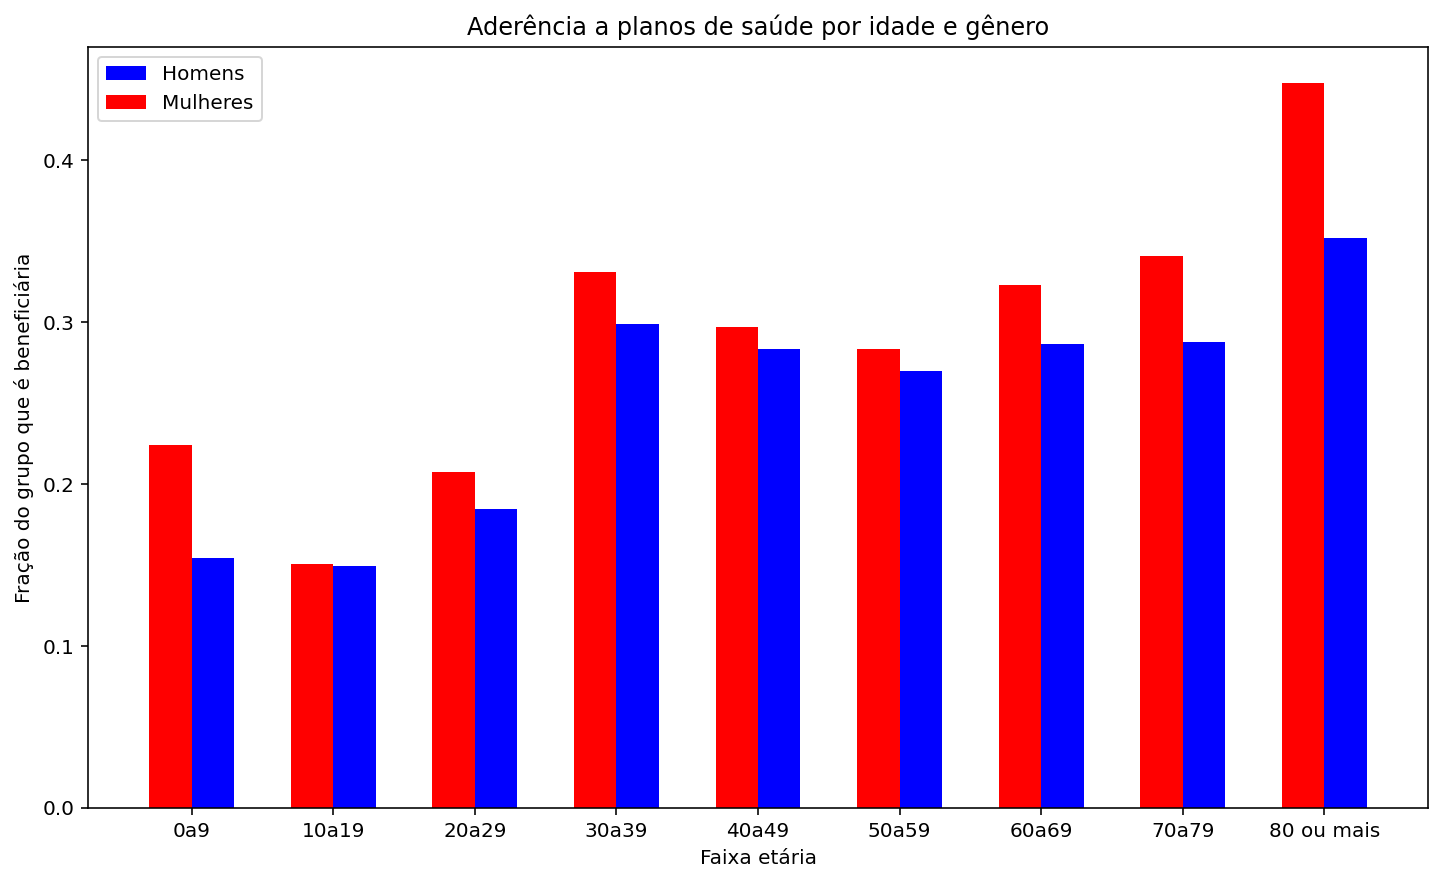

<Figure size 72x144 with 0 Axes>

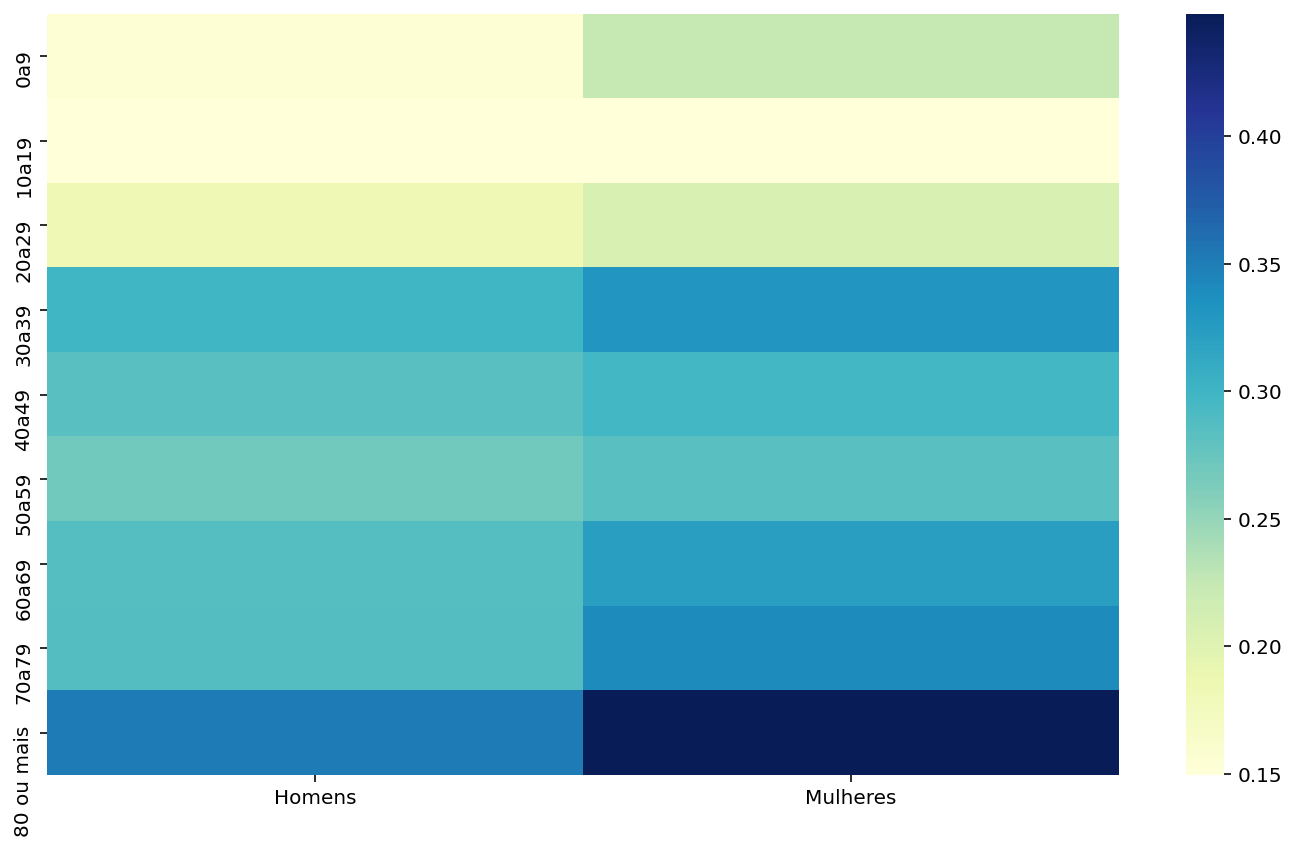

In [7]:
#Adesão a planos
plt.bar(idades, M_planos, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_planos, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.figure(figsize=[1,2])
plt.show()

#Mapa de calor
x=[]
for i in range(len(M_planos)):
    x+=[[M_planos[i],F_planos[i]]]
x=np.matrix(x)
ax=sns.heatmap(x,cmap="YlGnBu",yticklabels=idades,xticklabels=['Homens','Mulheres'])

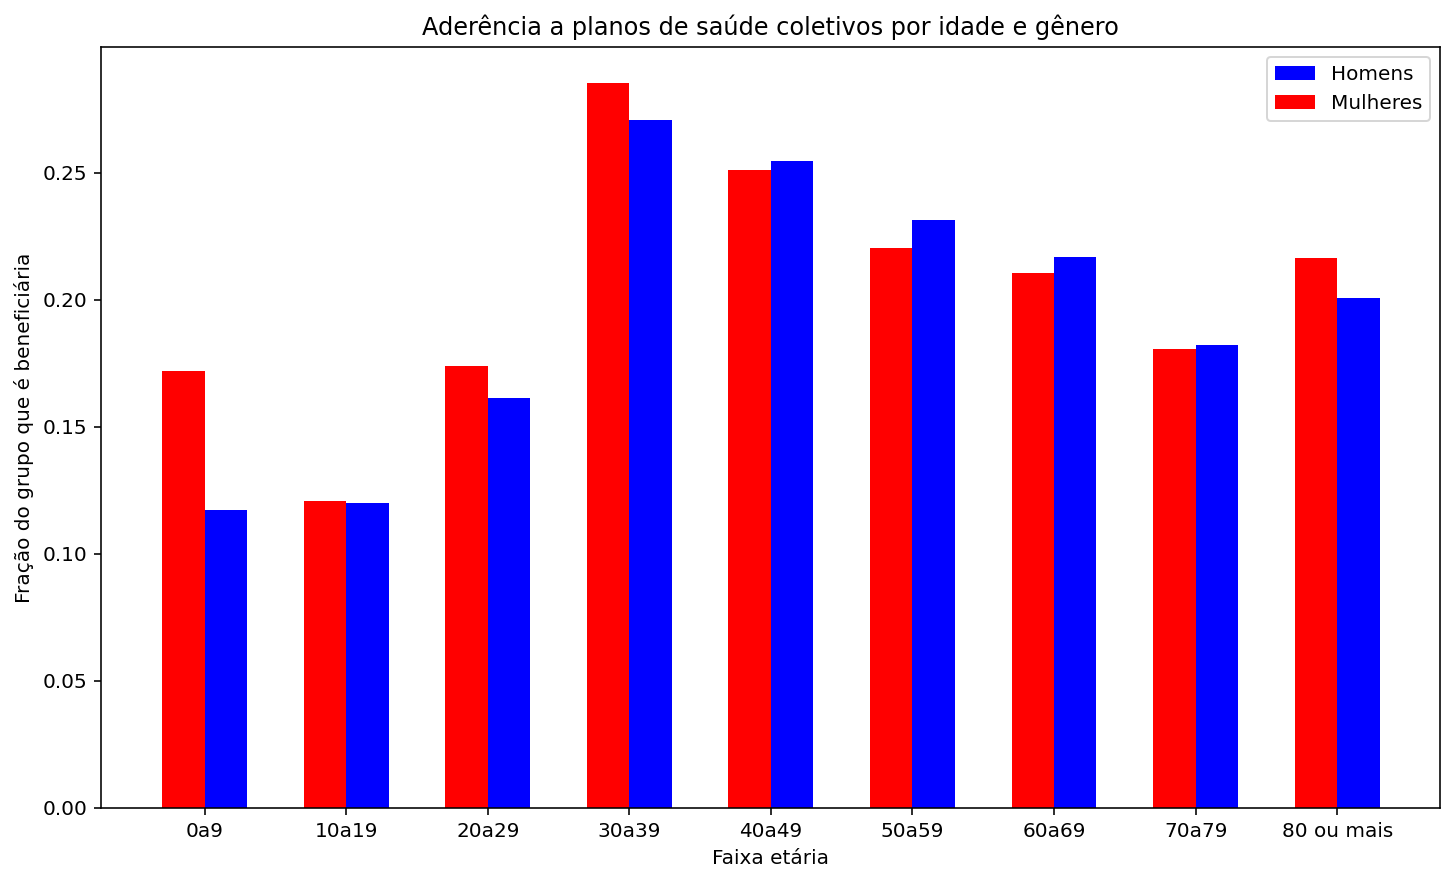

In [8]:
#Adesão a planos coletivos
plt.bar(idades, M_col, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_col, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde coletivos por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()

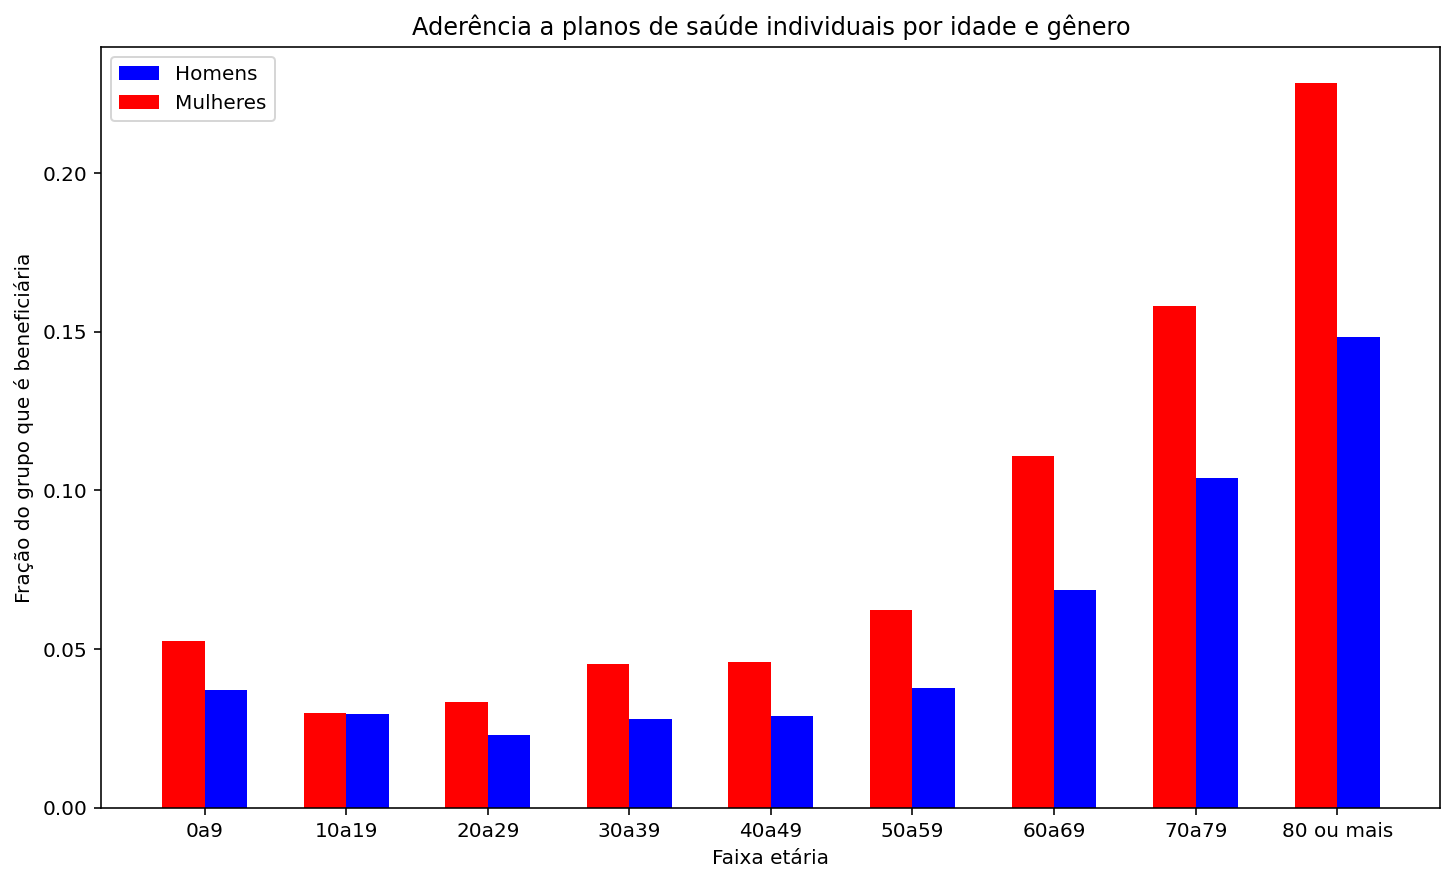

In [9]:
#Adesão a planos individuais
plt.bar(idades, M_ind, 0.3, align="edge",label='Homens', color="Blue")
plt.bar(idades, F_ind, -0.3, align="edge",label='Mulheres', color="Red")
plt.legend(('Homens','Mulheres'))
plt.title('Aderência a planos de saúde individuais por idade e gênero')
plt.ylabel("Fração do grupo que é beneficiária")
plt.xlabel("Faixa etária")
plt.show()

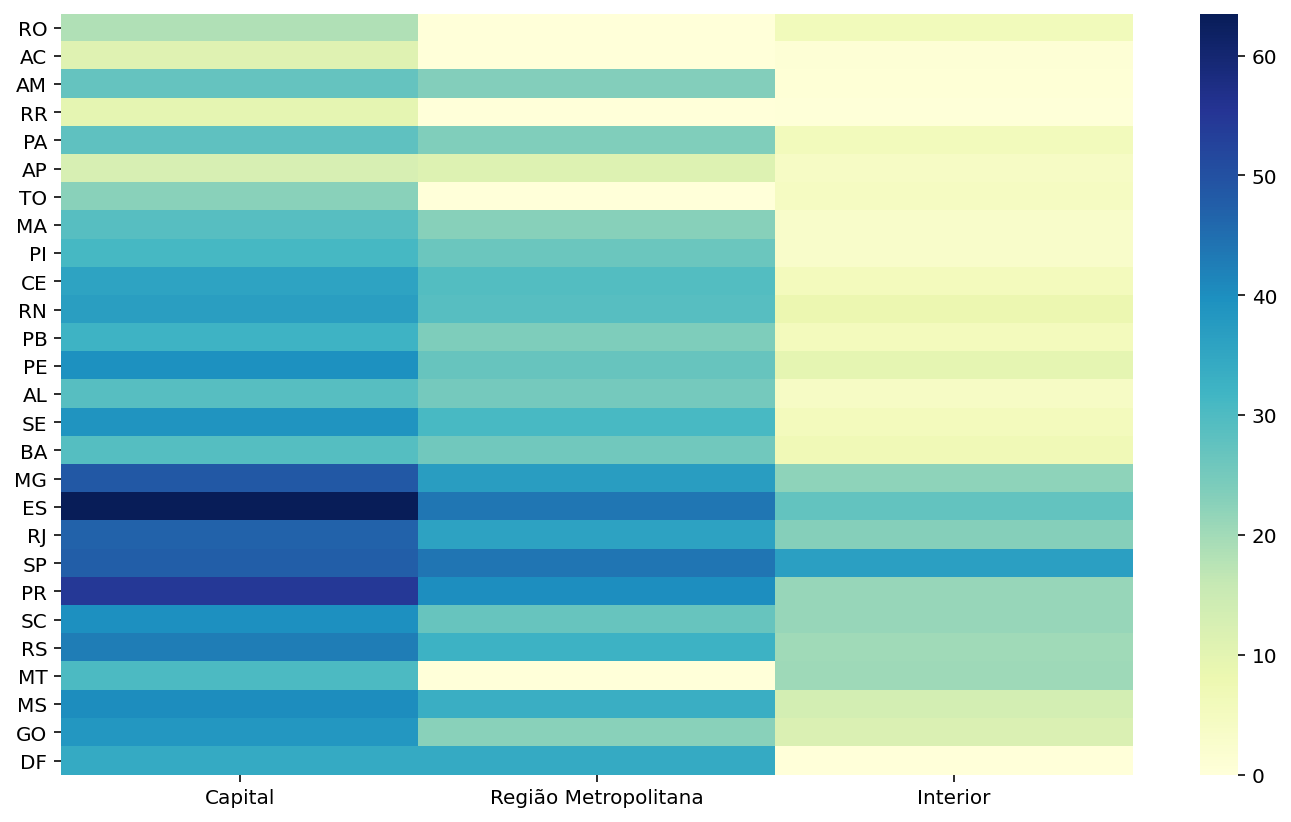

In [10]:
#Importando os dados dos planos do ano de 2019 
planos_si19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 5',index_col=0))
planos_est19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 4',index_col=0))
planos19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 1',index_col=0))
#Estados
estados=['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MT','MS','GO','DF']
regioes=['Capital','Região Metropolitana','Interior']
saude_r=[]
for i in range(31):
    if i not in[7,17,22,26]:
        saude_r+=[[planos_est[9+i,1],planos_est[9+i,2],planos_est[9+i,3]]]
saude_r=np.matrix(saude_r)
plt.title('Aderência a planos de saúde por est')
ax=sns.heatmap(saude_r,cmap="YlGnBu",yticklabels=estados,xticklabels=regioes)
plt.show()

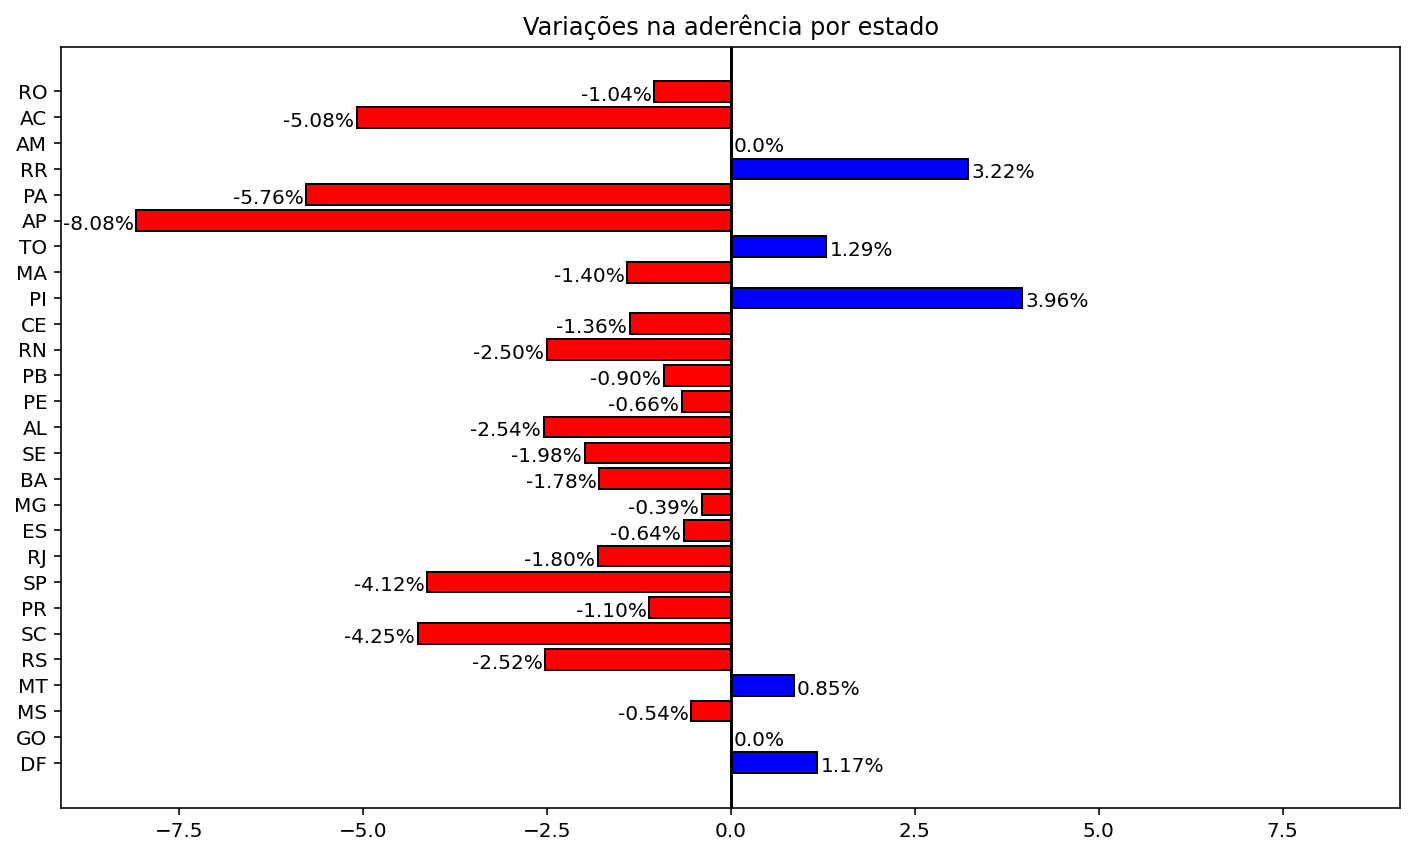

In [29]:
#Importando os dados dos planos do ano de 2019 
planos_si19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 5',index_col=0))
planos_est19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 4',index_col=0))
planos19=np.matrix(pd.read_excel("caderno_set19.xls",sheet_name='tab 1',index_col=0))
saude_r_dif=[]
cor=[]
estadosinv=[]
saudeinv=[]
corinv=[]
for i in range(31):
    if i not in[7,17,22,26]:
        x=100*(planos_est[9+i,0]-planos_est19[9+i,0])/planos_est19[9+i,0]
        if x>0:
            cor+=['blue']
        else:
            cor+=['red']
        saude_r_dif+=[x]
for i in range(len(estados)):
    estadosinv+=[estados[-i-1]]
    saudeinv+=[saude_r_dif[-i-1]]
    corinv+=[cor[-i-1]]
plt.barh(estadosinv, saudeinv,color=corinv, edgecolor='black')
for i in range(len(estados)):
    if saudeinv[i]<0:
        plt.text(saudeinv[i]-1,i-0.35,s=str(saudeinv[i])[:5]+'%')
    else:
        plt.text(saudeinv[i]+0.04,i-0.35,s=str(saudeinv[i])[:4]+'%')
plt.axvline(0,color='black')
plt.xlim(-9.1,9.1)
plt.title('Variações na aderência por estado')
plt.show()

Aderência a planos de saúde por estado


<AxesSubplot:>

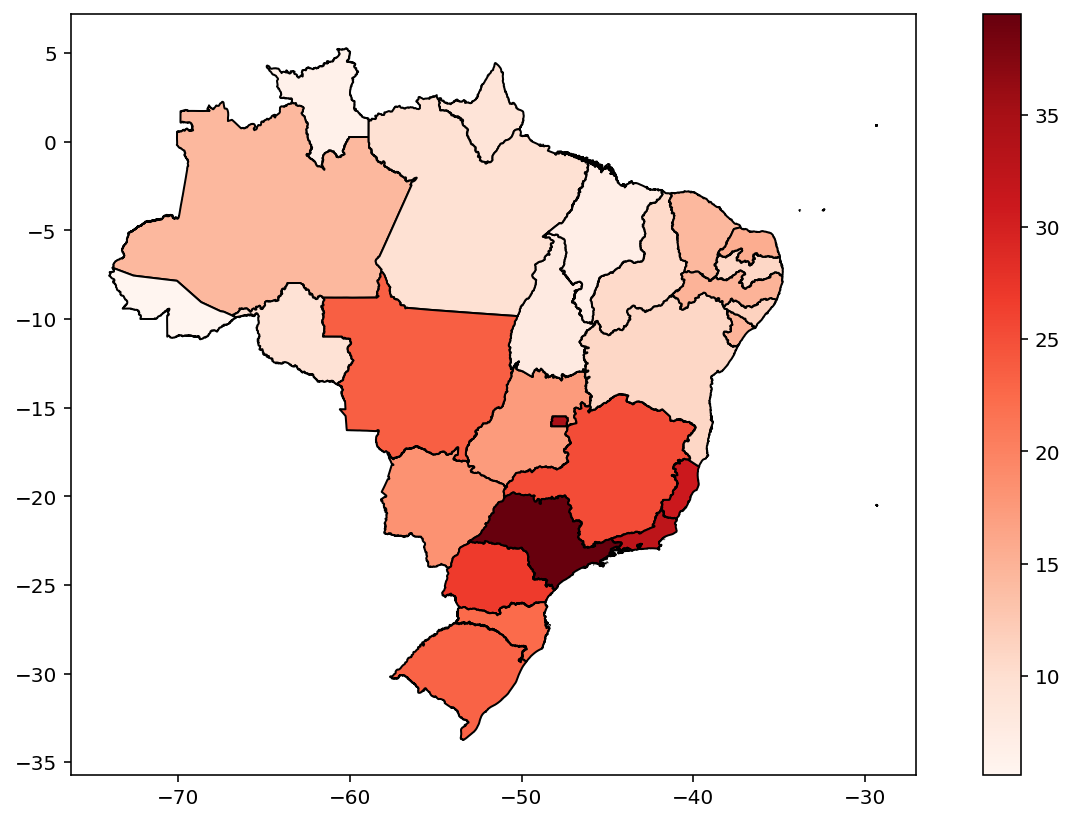

In [37]:
import geopandas as gpd
planos_map=np.matrix(pd.read_excel("caderno_set20.xls",sheet_name='tab 4'))
brazil=gpd.read_file('bcim_2016_21_11_2018.gpkg',layer='lim_unidade_federacao_a')
mapa_planos=[]
for i in range(31):
    if i not in[7,17,22,26]:
        mapa_planos+=[planos_est[9+i,0]]
data_saude={'sigla':estados,'planos':mapa_planos}
data_saude=pd.DataFrame(data=data_saude)
brazil=brazil.merge(data_saude, on='sigla',how='left')
print('Aderência a planos de saúde por estado')
brazil.plot(column='planos',cmap='Reds',legend='True',edgecolor='black')

<AxesSubplot:>

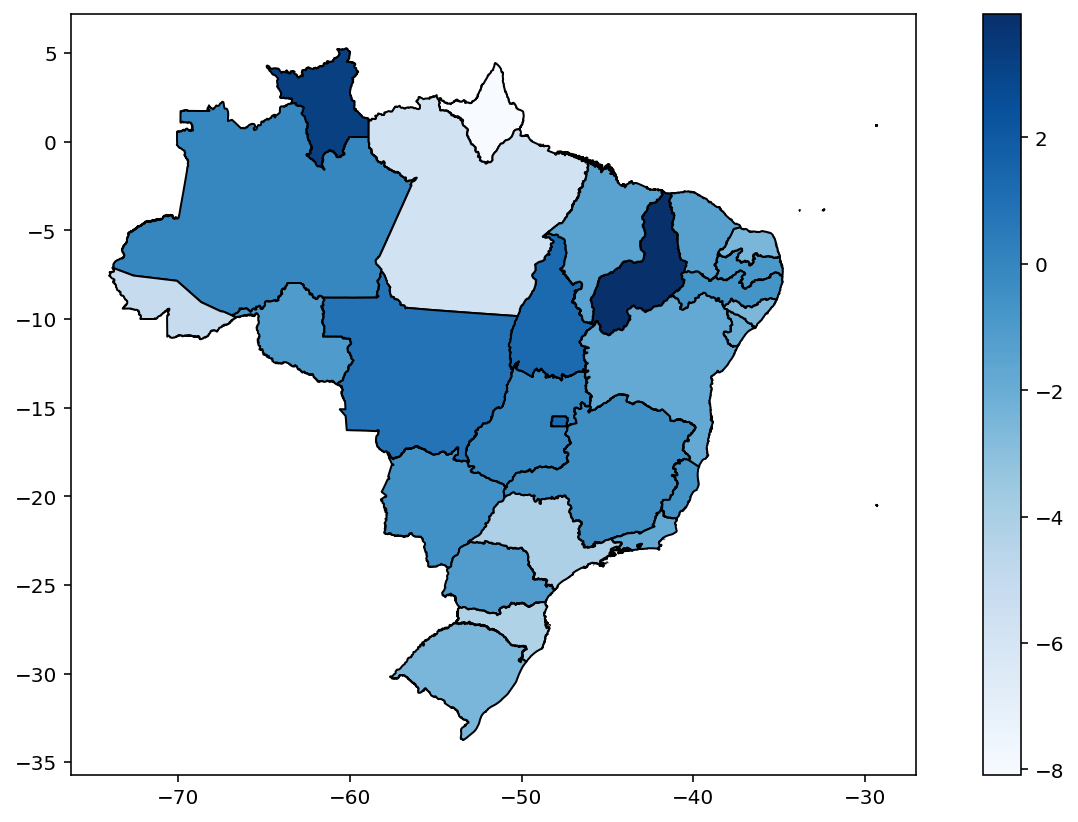

In [13]:
mapa_vari=[]
for i in range(31):
    if i not in[7,17,22,26]:
        mapa_vari+=[100*(planos_est[9+i,0]-planos_est19[9+i,0])/planos_est19[9+i,0]]
data_vari={'sigla':estados,'variacao':mapa_vari}
data_vari=pd.DataFrame(data=data_vari)
brazil=brazil.merge(data_vari, on='sigla',how='left')
brazil.plot(column='variacao',cmap='Blues',legend='True',edgecolor='black')